# Estimate moments from Taylor expansions

In this basic example we are going to estimate mean and standard deviation of an output variable of interest thanks to the Taylor variance decomposition method of order 1 or 2.

In [14]:
from __future__ import print_function
import openturns as ot

In [15]:
# Create a composite random vector
ot.RandomGenerator.SetSeed(0)
input_names = ['x1', 'x2', 'x3', 'x4']
myFunc = ot.SymbolicFunction(input_names,
    ['cos(x2*x2+x4)/(x1*x1+1+x3^4)'])
R = ot.CorrelationMatrix(4)
for i in range(4):
    R[i, i - 1] = 0.25
distribution = ot.Normal([0.2]*4, [0.1, 0.2, 0.3, 0.4], R)
distribution.setDescription(input_names)
# We create a distribution-based RandomVector
X = ot.RandomVector(distribution)
# We create a composite RandomVector Y from X and myFunc
Y = ot.CompositeRandomVector(myFunc, X)

In [16]:
# We create a Taylor expansion method to approximate moments
taylor = ot.TaylorExpansionMoments(Y)

In [17]:
# get 1st order mean
print(taylor.getMeanFirstOrder())

[0.932544]


In [18]:
# get 2nd order mean
print(taylor.getMeanSecondOrder())

[0.820295]


In [19]:
# get covariance
print(taylor.getCovariance())

[[ 0.0124546 ]]


In [20]:
# draw importance factors
taylor.getImportanceFactors()

class=PointWithDescription name=Unnamed dimension=4 description=[x1,x2,x3,x4] values=[0.181718,0.0430356,0.0248297,0.750417]

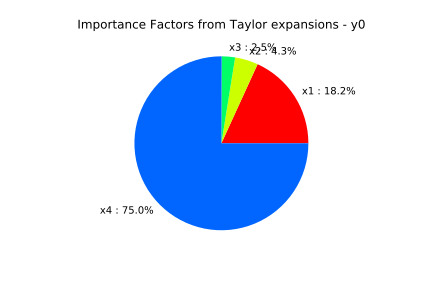

In [21]:
# draw importance factors
taylor.drawImportanceFactors()

In [22]:
# Get the value of the output at the mean point
taylor.getValueAtMean()

class=Point name=Unnamed dimension=1 values=[0.932544]

In [23]:
# Get the gradient value of the output at the mean point
taylor.getGradientAtMean()

class=Matrix implementation=class=MatrixImplementation name=Unnamed rows=4 columns=1 values=[-0.35812,-0.0912837,-0.0286496,-0.228209]

In [24]:
# Get the hessian value of the output at the mean point
taylor.getHessianAtMean()

class=SymmetricTensor implementation=class=TensorImplementation name=Unnamed rows=4 columns=4 sheets=1 values=[-1.51555,0.0350552,0.0220043,0.0876379,0,-0.605625,0.00280441,-0.373018,0,0,-0.427983,0.00701103,0,0,0,-0.932544]